In [1]:
from google.colab import files
files.upload()   # select churn_data.csv


Saving churn_data.csv to churn_data.csv


{'churn_data.csv': b'CustomerID,Gender,Age,Tenure,MonthlyCharges,Contract,Churn\r\n1001,Female,25,12,29.85,Month-to-month,Yes\r\n1002,Male,35,24,56.95,One year,No\r\n1003,Female,45,5,53.85,Month-to-month,Yes\r\n1004,Male,23,42,42.30,Two year,No\r\n1005,Female,52,2,70.70,Month-to-month,Yes\r\n1006,Male,30,8,99.65,Month-to-month,Yes\r\n1007,Female,40,58,89.10,Two year,No\r\n1008,Male,28,16,29.75,Month-to-month,Yes\r\n1009,Female,33,30,104.80,One year,No\r\n1010,Male,50,60,56.15,Two year,No\r\n1011,Female,29,4,49.95,Month-to-month,Yes\r\n1012,Male,36,45,99.90,Two year,No\r\n1013,Female,41,12,69.85,Month-to-month,Yes\r\n1014,Male,27,20,89.35,One year,No\r\n1015,Female,47,10,29.95,Month-to-month,Yes\r\n'}

In [2]:
import pandas as pd, os, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

os.makedirs("results", exist_ok=True)


In [3]:
df = pd.read_csv("churn_data.csv")
print(df.head())

df = df.drop("CustomerID", axis=1)
df["Gender"]   = df["Gender"].map({"Male":0,"Female":1})
df["Contract"] = df["Contract"].map({"Month-to-month":0,"One year":1,"Two year":2})
df["Churn"]    = df["Churn"].map({"No":0,"Yes":1})
print(df.info())


   CustomerID  Gender  Age  Tenure  MonthlyCharges        Contract Churn
0        1001  Female   25      12           29.85  Month-to-month   Yes
1        1002    Male   35      24           56.95        One year    No
2        1003  Female   45       5           53.85  Month-to-month   Yes
3        1004    Male   23      42           42.30        Two year    No
4        1005  Female   52       2           70.70  Month-to-month   Yes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          15 non-null     int64  
 1   Age             15 non-null     int64  
 2   Tenure          15 non-null     int64  
 3   MonthlyCharges  15 non-null     float64
 4   Contract        15 non-null     int64  
 5   Churn           15 non-null     int64  
dtypes: float64(1), int64(5)
memory usage: 852.0 bytes
None


In [4]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cm


Accuracy: 1.0
Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



array([[2, 0],
       [0, 1]])

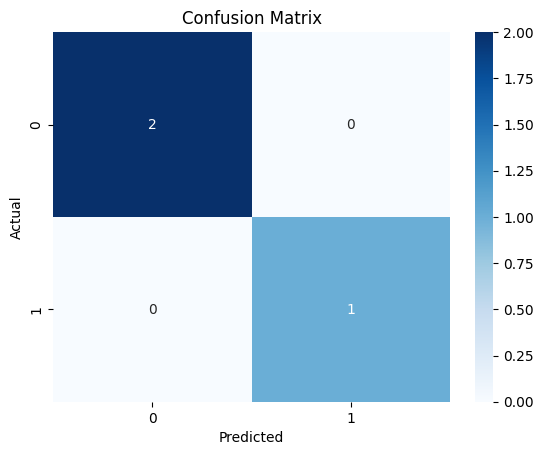

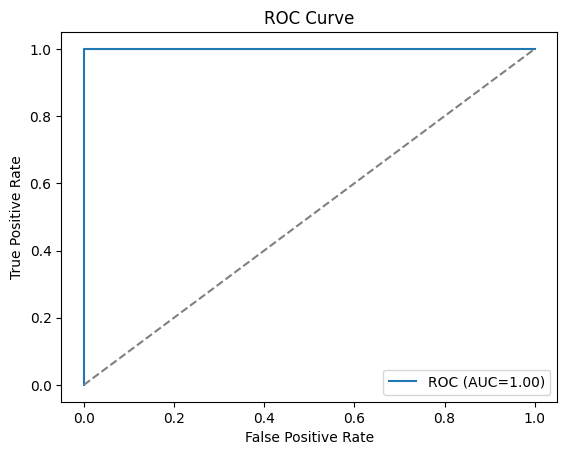

In [5]:
# Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.title("Confusion Matrix")
plt.savefig("results/confusion_matrix.png")
plt.show()

# ROC Curve
y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC (AUC={roc_auc:.2f})')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve"); plt.legend()
plt.savefig("results/roc_curve.png")
plt.show()
